In [ ]:
import os
import glob
from keras_video import VideoFrameGenerator
import numpy as np
import pandas as pd

## Data Loading and Preprocessing

In [ ]:
# Use sub directories names as classes
classes = [i.split(os.path.sep)[1] for i in glob.glob('Dataset/*')]
classes.sort()

# Some global params
SIZE = (224, 224)    # Image size
CHANNELS = 3         # Color channel
NBFRAME = 30         # Frames per video
BS = 2               # Batch size

# Pattern to get videos and classes
glob_pattern = 'Dataset/{classname}/*.mp4'

# Create video frame generator
train = VideoFrameGenerator(
    classes=classes, 
    glob_pattern=glob_pattern,
    nb_frames=NBFRAME,
    split_val=.20,
    split_test=.20, 
    shuffle=True,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    transformation=None, # Data Augmentation
    use_frame_cache=False,
    seed=42)

class Agem_Kanan, validation count: 24, test count: 19, train count: 77
class Agem_Kiri, validation count: 24, test count: 19, train count: 77
class Ngegol, validation count: 24, test count: 19, train count: 77
class Nyalud, validation count: 24, test count: 19, train count: 77
class Nyeregseg, validation count: 24, test count: 19, train count: 77
class Seledet, validation count: 24, test count: 19, train count: 77
class Ulap_Ulap, validation count: 24, test count: 19, train count: 77
Total data: 7 classes for 539 files for train


In [ ]:
valid = train.get_validation_generator()
test = train.get_test_generator()

Total data: 7 classes for 168 files for validation
Total data: 7 classes for 133 files for test


## Modeling

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling3D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from i3d_inception import Inception_Inflated3d

In [ ]:
input_shape = (NBFRAME,) + SIZE + (CHANNELS,)

In [ ]:
# Define I3D 
i3d = Inception_Inflated3d(
                include_top=False,
                weights='rgb_kinetics_only',
                input_shape=input_shape,
                classes=7)
i3d.trainable = False

# Define model
model = Sequential()
model.add(i3d)

# Classification layer
model.add(GlobalAveragePooling3D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(int(len(classes)), activation='softmax'))

model.summary()

49602560/49595336 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
i3d_inception (Functional)   (None, 3, 1, 1, 1024)     12294544  
_________________________________________________________________
global_average_pooling3d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 3591      
Total params: 12,822,935
Trainable params: 528,391
Non-trainable params: 12,294,544
_________________________________________________________________


In [ ]:
epochs = 100

earlystop = EarlyStopping(monitor='loss', patience=10)
checkpoint = ModelCheckpoint('Checkpoint/i3d.h5', monitor='val_acc', save_best_only=True, mode='max', verbose=1)

callbacks = [earlystop, checkpoint]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(train,
                    validation_data=valid,
                    epochs=epochs,
                    callbacks=callbacks)

Epoch 1/100
269/269 [==============================] - 121s 422ms/step - loss: 2.0787 - acc: 0.1962 - val_loss: 1.5408 - val_acc: 0.3155

Epoch 00001: val_acc improved from -inf to 0.31548, saving model to Checkpoint/i3d.h5
Epoch 2/100
269/269 [==============================] - 99s 368ms/step - loss: 1.5290 - acc: 0.4028 - val_loss: 1.3600 - val_acc: 0.4167

Epoch 00002: val_acc improved from 0.31548 to 0.41667, saving model to Checkpoint/i3d.h5
Epoch 3/100
269/269 [==============================] - 100s 370ms/step - loss: 1.2983 - acc: 0.4413 - val_loss: 1.2292 - val_acc: 0.4940

Epoch 00003: val_acc improved from 0.41667 to 0.49405, saving model to Checkpoint/i3d.h5
Epoch 4/100
269/269 [==============================] - 99s 369ms/step - loss: 1.2057 - acc: 0.5108 - val_loss: 1.1835 - val_acc: 0.5119

Epoch 00004: val_acc improved from 0.49405 to 0.51190, saving model to Checkpoint/i3d.h5
Epoch 5/100
269/269 [==============================] - 99s 369ms/step - loss: 1.1805 - acc: 0.512

269/269 [==============================] - 98s 364ms/step - loss: 0.2716 - acc: 0.8801 - val_loss: 0.5752 - val_acc: 0.7619

Epoch 00041: val_acc did not improve from 0.81548
Epoch 42/100
269/269 [==============================] - 97s 362ms/step - loss: 0.2762 - acc: 0.9080 - val_loss: 0.5444 - val_acc: 0.7738

Epoch 00042: val_acc did not improve from 0.81548
Epoch 43/100
269/269 [==============================] - 98s 364ms/step - loss: 0.2672 - acc: 0.8933 - val_loss: 0.5662 - val_acc: 0.7679

Epoch 00043: val_acc did not improve from 0.81548
Epoch 44/100
269/269 [==============================] - 98s 363ms/step - loss: 0.2791 - acc: 0.8901 - val_loss: 0.5120 - val_acc: 0.7917

Epoch 00044: val_acc did not improve from 0.81548
Epoch 45/100
269/269 [==============================] - 98s 365ms/step - loss: 0.3480 - acc: 0.8754 - val_loss: 0.5465 - val_acc: 0.7798

Epoch 00045: val_acc did not improve from 0.81548
Epoch 46/100
269/269 [==============================] - 98s 363ms/step - 

269/269 [==============================] - 98s 366ms/step - loss: 0.1559 - acc: 0.9428 - val_loss: 0.5174 - val_acc: 0.8214

Epoch 00084: val_acc did not improve from 0.83929
Epoch 85/100
269/269 [==============================] - 97s 362ms/step - loss: 0.1473 - acc: 0.9482 - val_loss: 0.5998 - val_acc: 0.8274

Epoch 00085: val_acc did not improve from 0.83929
Epoch 86/100
269/269 [==============================] - 97s 362ms/step - loss: 0.1507 - acc: 0.9393 - val_loss: 0.7383 - val_acc: 0.7738

Epoch 00086: val_acc did not improve from 0.83929
Epoch 87/100
269/269 [==============================] - 98s 363ms/step - loss: 0.2624 - acc: 0.8961 - val_loss: 0.5353 - val_acc: 0.8214

Epoch 00087: val_acc did not improve from 0.83929
Epoch 88/100
269/269 [==============================] - 97s 359ms/step - loss: 0.0989 - acc: 0.9737 - val_loss: 0.5229 - val_acc: 0.8750

Epoch 00088: val_acc improved from 0.83929 to 0.87500, saving model to Checkpoint/i3d.h5
Epoch 89/100
269/269 [============

In [ ]:
model.save(f'Model/tari/i3d-100e-0.82.h5')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

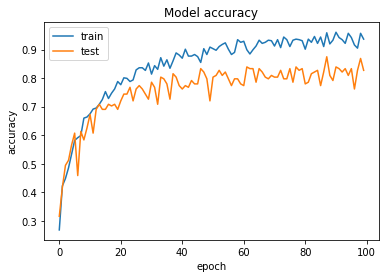

In [ ]:
# Summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

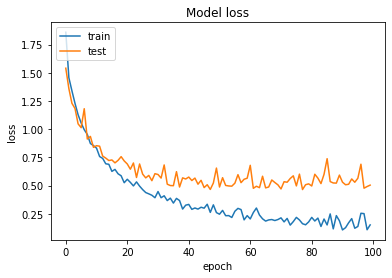

In [ ]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Save history to csv
hist_df = pd.DataFrame(history.history)
hist_csv_file = 'history_i3d.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

## Testing

In [ ]:
model.evaluate(test)

66/66 [==============================] - 20s 300ms/step - loss: 0.8534 - acc: 0.7879


[0.8534486293792725, 0.7878788113594055]

In [ ]:
y_test = []
y_predict = []
for step in range(test.files_count//BS):
    X, y = test.next()
    prediction = model.predict(X)
    y_test.extend(y)
    y_predict.extend(prediction)

In [ ]:
y_true = np.argmax(y_test, axis=1)
prediction = np.argmax(y_predict, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, \
roc_curve, auc

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true, prediction)
print(f'Accuracy: {np.round(accuracy, 3)}')
# precision tp / (tp + fp)
precision = precision_score(y_true, prediction, average='macro')
print(f'Precision: {np.round(precision, 3)}')
# recall: tp / (tp + fn)
recall = recall_score(y_true, prediction, average='macro')
print(f'Recall: {np.round(recall, 3)}')
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, prediction, average='macro')
print(f'F1 score: {np.round(f1, 3)}')

Accuracy: 0.788
Precision: 0.811
Recall: 0.785
F1 score: 0.783


## Discussion

In [ ]:
target_names = test.classes
print(classification_report(y_true, prediction, target_names=target_names))

              precision    recall  f1-score   support

  Agem_Kanan       0.67      0.74      0.70        19
   Agem_Kiri       0.67      0.44      0.53        18
      Ngegol       1.00      1.00      1.00        19
      Nyalud       0.56      0.95      0.71        19
   Nyeregseg       0.94      0.79      0.86        19
     Seledet       1.00      1.00      1.00        19
   Ulap_Ulap       0.85      0.58      0.69        19

    accuracy                           0.79       132
   macro avg       0.81      0.79      0.78       132
weighted avg       0.81      0.79      0.79       132



<AxesSubplot:>

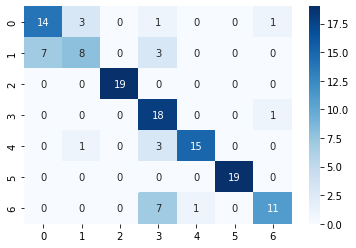

In [ ]:
matrix = confusion_matrix(y_true, prediction)
sns.heatmap(matrix, annot=True, cmap='Blues')

In [ ]:
fpr, tpr, _ = roc_curve(y_true, prediction, pos_label=6)
auc_score = auc(fpr, tpr)
print(f'AUC Score : {np.round(auc_score, 3)}')

AUC Score : 0.823


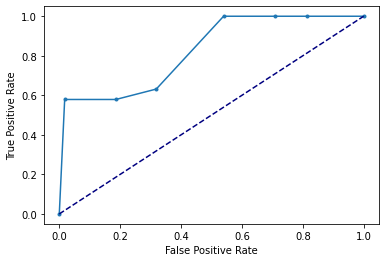

In [ ]:
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Model from checkpoint

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
ckp_model = load_model('Checkpoint/i3d.h5')

In [ ]:
ckp_model.evaluate(test)

66/66 [==============================] - 20s 287ms/step - loss: 0.8028 - acc: 0.8030


[0.8028071522712708, 0.8030303120613098]

In [ ]:
y_test = []
y_predict = []
for step in range(test.files_count//BS):
    X, y = test.next()
    prediction = ckp_model.predict(X)
    y_test.extend(y)
    y_predict.extend(prediction)

In [ ]:
y_true = np.argmax(y_test, axis=1)
prediction = np.argmax(y_predict, axis=1)

In [ ]:
target_names = test.classes
print(classification_report(y_true, prediction, target_names=target_names))

              precision    recall  f1-score   support

  Agem_Kanan       0.75      0.63      0.69        19
   Agem_Kiri       0.68      0.79      0.73        19
      Ngegol       1.00      1.00      1.00        19
      Nyalud       0.64      0.84      0.73        19
   Nyeregseg       0.76      0.72      0.74        18
     Seledet       1.00      0.95      0.97        19
   Ulap_Ulap       0.87      0.68      0.76        19

    accuracy                           0.80       132
   macro avg       0.81      0.80      0.80       132
weighted avg       0.82      0.80      0.80       132



<AxesSubplot:>

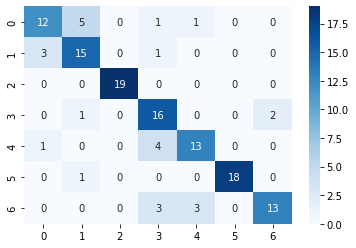

In [ ]:
matrix = confusion_matrix(y_true, prediction)
sns.heatmap(matrix, annot=True, cmap='Blues')

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true, prediction)
print(f'Accuracy: {np.round(accuracy, 3)}')
# precision tp / (tp + fp)
precision = precision_score(y_true, prediction, average='macro')
print(f'Precision: {np.round(precision, 3)}')
# recall: tp / (tp + fn)
recall = recall_score(y_true, prediction, average='macro')
print(f'Recall: {np.round(recall, 3)}')
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, prediction, average='macro')
print(f'F1 score: {np.round(f1, 3)}')

Accuracy: 0.803
Precision: 0.815
Recall: 0.802
F1 score: 0.804


In [ ]:
fpr, tpr, _ = roc_curve(y_true, prediction, pos_label=6)
auc_score = auc(fpr, tpr)
print(f'AUC Score : {np.round(auc_score, 3)}')

AUC Score : 0.893


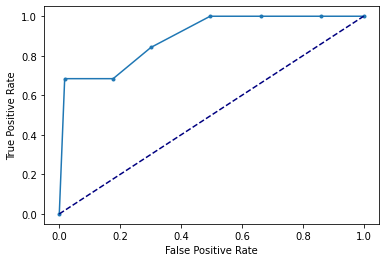

In [ ]:
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()